#### Dataset:
Sales prediction is a very common real-life problem that each company faces atleast once in its lifetime. If done correctly, it can have a significant impact on the success and performance of that company. According to a study, companies with accurate sales predictions are 10% more likely to grow their revenue year-over-year and 7.3% more likely to hit quota.

The notebook is divided into below modules:
#### 1.Exploratory Data Analysis
#### 2.Data Preparation

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

train = pd.read_csv("Train.csv")


FileNotFoundError: [Errno 2] File b'Train.csv' does not exist: b'Train.csv'

In [ ]:
####Read Test File ####
####Assign it to test variable####
test  = pd.read_csv("Test.csv")

#### Why do we need Exploratory Data Analysis (EDA)?
After understanding the dimensions and properties of data, we have to deep dive and explore the data visually. It helps us in understanding the nature of data in terms of distribution of the individual variables/features, finding missing values, relationship with other variables and many other things.

Let’s start with univariate EDA. It involves exploring variables individually. We will try to visualize the continuous variables using histograms and categorical variables using bar plots.

## Exploratory Data Analysis
There are no shortcuts for data exploration. If you are in a state of mind, that machine learning can sail you away from every data storm, it won’t. After some point of time, you’ll realize that you are struggling at improving model’s accuracy. In such situation, data exploration techniques will come to your rescue.
#### 1. Steps of Data Exploration and Preparation
Remember the quality of your inputs decide the quality of your output. So, once you have got your business hypothesis ready, it makes sense to spend lot of time and efforts here. Data exploration, cleaning and preparation can take up to 70-80% of your total project time.<br/>
Below are the steps involved to understand, clean and prepare your data for building your predictive model:<br/>

1.Variable Identification<br/>
2.Univariate Analysis (Both descriptive and graphical)<br/>
3.Bi-variate Analysis (Both descriptive and graphical)<br/>
4.Missing values treatment<br/>
5.Outlier treatment<br/>
6.Variable transformation<br/>
7.Variable creation (Feature Engineering)<br/>
<br/> Finally, we will need to iterate over steps 4 – 7 multiple times before we come up with our refined model.<br/>
Let’s now study each stage in  detail:-

###### 1.Variable Identification
First, identify Predictor (Input/Independent variable) and Target (output/dependent variable) variables. Next, identify the data type and category of the variables and the meaning of each variables(data dictionary)
Q. What is our target variable?
Q. What are our predictor variables?

In [ ]:
train.head(10)

In [ ]:
train.columns

In [ ]:
####Exercise ####
####Check the data types of the columns and how many values are missing for each columns####
train.info()

##### 2.Uni-Variate Analysis
At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

###### Continuous Variables:- 
In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics visualization methods

###### Note: 
Univariate analysis is also used to highlight missing and outlier values. We will discuss in further later

###### Categorical Variables:-
For categorical variables, we’ll use frequency table to understand distribution of each category. We can also read as percentage of values under each category. It can be be measured using two metrics, Count and Count% against each category. Bar chart can be used as visualization.

Let's jump to analyse the variables!!

##### Dependent Variable (Continuous)

In [ ]:
#First lets look at the summary statistic of the target variable
train.Item_Outlet_Sales.describe()
train[["Item_Outlet_Sales"]].describe()

In [ ]:
#Rather than looking only at the numbers, we can visualize the data to understand it more
plt.hist(train.Item_Outlet_Sales,bins=100,rwidth=1)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Count")
plt.show()

As we can see, it is a right skewd variable and would need some data transformation to treat its skewness.

##### Independent Variables (numeric variables)
Now let’s check the numeric independent variables. We’ll again use the histograms for visualizations because that will help us in visualizing the distribution of the variables.

In [5]:
####Exercise ####
####Calculate descriptive statistic of every numeric variable####
train["Item_Weight"].describe()

NameError: name 'train' is not defined

You should see from above that Item_Weight has a lot of missing values. While visualizing this variable we need to take note of this point

In [ ]:
####Exercise####
####Plot the histogram of continous variables####
plt.hist(train["Item_MRP"],bins=100)
plt.show()

In [ ]:
plt.hist(train.Item_Visibility,bins=100,rwidth=1)
plt.xlabel("Item_visibility")
plt.ylabel("count")
plt.show()

__Observations you should get__

- There seems to be no clear-cut pattern in Item_Weight.<br/>
- Item_Visibility is right-skewed and should be transformed to curb its skewness.<br/>
- We can clearly see 4 different distributions for Item_MRP. It is an interesting insight.

__Independent Variables (categorical variables)__ <br/>
Now we’ll try to explore and gain some insights from the categorical variables.<br/>
A categorical variable or feature can have only a finite set of values. Let’s first plot Item_Fat_Content.

In [ ]:
train["Item_Fat_Content"].value_counts().plot(kind='bar')
plt.show()

In the figure above, ‘LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one.<br/> Similarly we can be done for ‘reg’ and ‘Regular’ into one. After making these corrections we’ll plot the same figure again

In [ ]:
#### Exercise #####
#### Replace "LF" and "low fat" in "Item_Fat_Content" with "Low Fat"####
for index,row in train.iterrows():
    if row["Item_Fat_Content"]=="LF":
        train.loc[index,"Item_Fat_Content"]="Low Fat"
    elif row["Item_Fat_Content"]=="low fat":
        train.loc[index,"Item_Fat_Content"]="Low Fat"

In [ ]:


bool_ind = train["Item_Fat_Content"]=="reg"
train.loc[[bool_ind,"Item_Fat_Content"]]="Regular"

In [ ]:
#### Exercise ####
#### Replace "reg" in "Item_Fat_Content" with "Regular"####
for index,row in train.iterrows():
    if row["Item_Fat_Content"]=="reg":
        train.loc[index,"Item_Fat_Content"]="Regular"

In [ ]:
train["Item_Fat_Content"].value_counts().plot(kind='bar')
plt.show()

Now let’s check the other categorical variables.

In [ ]:
###Exercise:Analyze column Item_Type####
train["Item_Type"].value_counts().plot(kind='pie')
plt.show()

In [ ]:
####Exercise:Analyze Column Outlet Size####
train["Outlet_Size"].value_counts(dropna=False).plot(kind='bar')
plt.show()

In [ ]:
####Exercise:Analyze Column Outlet Type ####
train["Outlet_Type"].value_counts().plot(kind='bar')
plt.show()

__Observations you should get__

Lesser number of observations in the data for the outlets established in the year 1998 as compared to the other years.<br/>
Supermarket Type 1 seems to be the most popular category of Outlet_Type.

#### 3.Bivariate Analysis
Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

Let’s understand the possible combinations in detail:

__Continuous & Continuous__: While doing bi-variate analysis between two continuous variables, we should look at scatter plot. It is a nifty way to find out the relationship between two variables. The pattern of scatter plot indicates the relationship between variables. The relationship can be linear or non-linear.
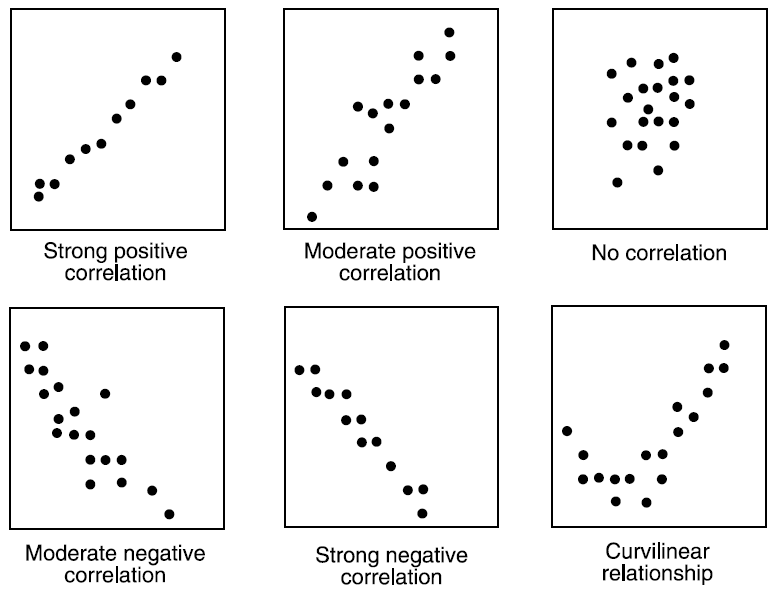


Scatter plot shows the relationship between two variable but does not indicates the strength of relationship amongst them. To find the strength of the relationship, we use Correlation. Correlation varies between -1 and +1.

- -1: perfect negative linear correlation
- +1:perfect positive linear correlation and 
- 0: No correlation
Correlation can be derived using following formula:

Correlation = Covariance(X,Y) / SQRT( Var(X)* Var(Y))

Various tools have function or functionality to identify correlation between variables. 

__Categorical & Categorical__: To find the relationship between two categorical variables, we can use following methods:

- Two-way table: We can start analyzing the relationship by creating a two-way table of count and count%. The rows represents the category of one variable and the columns represent the categories of the other variable. We show count or count% of observations available in each combination of row and column categories.
- Stacked Column Chart: This method is more of a visual form of Two-way table.
<img src="img/img2.png">

- Chi-Square Test: This test is used to derive the statistical significance of relationship between the variables. Also, it tests whether the evidence in the sample is strong enough to generalize that the relationship for a larger population as well. Chi-square is based on the difference between the expected and observed frequencies in one or more categories in the two-way table. It returns probability for the computed chi-square distribution with the degree of freedom.


__Categorical & Continuous__: While exploring relation between categorical and continuous variables, we can draw box plots for each level of categorical variables. If levels are small in number, it will not show the statistical significance. To look at the statistical significance we can perform Z-test, T-test or ANOVA.

- Z-Test/ T-Test:- Either test assess whether mean of two groups are statistically different from each other or not.If the probability of Z is small then the difference of two averages is more significant. The T-test is very similar to Z-test but it is used when number of observation for both categories is less than 30.

- ANOVA:- It assesses whether the average of more than two groups is statistically different.


After looking at every feature individually, let’s now do some bivariate analysis. Here we’ll explore the independent variables with respect to the target variable. The objective is to discover hidden relationships between the independent variable and the target variable and use those findings in missing data imputation and feature engineering in the next module.

### Target Variable vs Independent Numerical Variables###
Let’s explore the numerical variables first.

In [ ]:


bool_na =np.isnan(train.Item_Weight)

np.corrcoef(train.Item_Weight[np.logical_not(bool_na)],train.Item_Outlet_Sales[np.logical_not(bool_na)])

In [ ]:
plt.scatter(x=train.Item_Weight,y=train.Item_Outlet_Sales)
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.show()

In [ ]:
#### Exercise: Study the relationship between Item_Outlet_Sale and Item_Visibility ####
plt.scatter(x=train.Item_Visibility,y=train.Item_Outlet_Sales)
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.show()

In [ ]:
#### Exercise: Study the relationship between Item_Outlet_Sale and Item_MRP ####
plt.scatter(x=train.Item_MRP,y=train.Item_Outlet_Sales)
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.show()

__Observations you should get__

- Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.
- In Item_Visibility vs Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero. We will take note of this issue and deal with it in the later stages.
- In the third plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.

### Target Variable vs Independent Categorical Variables ###
Now we’ll visualise the categorical variables with respect to Item_Outlet_Sales. We will try to check the distribution of the target variable across all the categories of each of the categorical variable. We will use boxplot to visualize it.

In [ ]:
#For better visualization I have drawn the boxplot horizontally(passing x as sales)
sns.boxplot(x=train.Item_Outlet_Sales,y=train.Item_Type)
plt.show()

In [ ]:
sns.boxplot(y=train.Item_Outlet_Sales)

In [ ]:
#### Exercise: Analyze Item_Outlet_Sales and Item_Fat_Content ####
sns.boxplot(y=train.Item_Outlet_Sales,x=train.Item_Fat_Content)
plt.show()

In [ ]:
sns.boxplot(y=train.Outlet_Identifier,x=train.Item_Outlet_Sales)
plt.show()

__Observations__

- Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct and same is the case with Item_Fat_Content.
- The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.

In [ ]:
sns.boxplot(x=train.Outlet_Size,y=train.Item_Outlet_Sales)
plt.show()

In [ ]:
#### Exercise: Analyze Item_Outlet_Sales and Outlet_Location_Type ####
sns.boxplot(y=train.Outlet_Location_Type,x=train.Item_Outlet_Sales)
plt.show()

In [ ]:
sns.boxplot(y=train.Outlet_Type,x=train.Item_Outlet_Sales)
plt.show()

__Observations you should get__

- Tier 1 and Tier 3 locations of Outlet_Location_Type look similar.
- In the Outlet_Type plot, Grocery Store has most of its data points around the lower sales values as compared to the other categories.


These are the kind of insights that we can extract by visualizing our data. Hence, data visualization should be an important part of any kind data analysis.

#### 4. Missing Value Treatment ####
 

__Why missing values treatment is required?__ <br/>
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.
<img src="img/img3.png">

Notice the missing values in the image shown above: In the left scenario, we have not treated missing values. The inference from this data set is that the chances of playing cricket by males is higher than females. On the other hand, if you look at the second table, which shows data after treatment of missing values (based on gender), we can see that females have higher chances of playing cricket compared to males.

__Why my data has missing values?__
We looked at the importance of treatment of missing values in a dataset. Now, let’s identify the reasons for occurrence of these missing values. They may occur at two stages:

__1.Data Extraction__: It is possible that there are problems with extraction process. In such cases, we should double-check for correct data with data guardians. Some hashing procedures can also be used to make sure data extraction is correct. Errors at data extraction stage are typically easy to find and can be corrected easily as well. <br/>
__2.Data collection__: These errors occur at time of data collection and are harder to correct. They can be categorized in four types:
- Missing completely at random: This is a case when the probability of missing variable is same for all observations. For example: respondents of data collection process decide that they will declare their earning after tossing a fair coin. If an head occurs, respondent declares his / her earnings & vice versa. Here each observation has equal chance of missing value.
- Missing at random: This is a case when variable is missing at random and missing ratio varies for different values / level of other input variables. For example: We are collecting data for age and female has higher missing value compare to male.
- Missing that depends on unobserved predictors: This is a case when the missing values are not random and are related to the unobserved input variable. For example: In a medical study, if a particular diagnostic causes discomfort, then there is higher chance of drop out from the study. This missing value is not at random unless we have included “discomfort” as an input variable for all patients.
- Missing that depends on the missing value itself: This is a case when the probability of missing value is directly correlated with missing value itself. For example: People with higher or lower income are likely to provide non-response to their earning.

__Which are the methods to treat missing values ?__
- __Deletion__:  It is of two types: List Wise Deletion and Pair Wise Deletion.
  - In list wise deletion, we delete observations where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.
  - In pair wise deletion, we perform analysis with all cases in which the variables of interest are present. Advantage of this method is, it keeps as many cases available for analysis. One of the disadvantage of this method, it uses different sample size for different variables.
  - Deletion methods are used when the nature of missing data is “Missing completely at random” else non random missing values can bias the model output. Also it's advised not to use deletion method when more than 5% of data is missing.
<img src="img/img4.png">

- __Mean/ Mode/ Median Imputation__: Imputation is a method to fill in the missing values with estimated ones. The objective is to employ known relationships that can be identified in the valid values of the data set to assist in estimating the missing values. Mean / Mode / Median imputation is one of the most frequently used methods. It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable. It can be of two types:-
    - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median. Like in above table, variable “Manpower” is missing so we take average of all non missing values of “Manpower”  (28.33) and then replace missing value with it.
    - Similar case Imputation: In this case, we calculate average for gender “Male” (29.75) and “Female” (25) individually of non missing values then replace the missing value based on gender. For “Male“, we will replace missing values of manpower with 29.75 and for “Female” with 25.
    
- __Prediction Model__:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.We can use regression, Logistic regression and various modeling technique to perform this. There are 2 drawbacks for this approach:
    - The model estimated values are usually more well-behaved than the true values
    - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

In [ ]:
#you can get the # missing values in two ways
print(sum(np.isnan(train.Item_Weight)))
print(train.info())

__Imputing Missing Value__ <br/>
As you can see above, we have missing values in Item_Weight. We’ll now impute Item_Weight with mean weight based on the Item_Identifier variable.

In [ ]:
ind = np.isnan(train.Item_Weight)
for index,row in train.iterrows():
    if ind[index]==True:
        item = row["Item_Identifier"]
        train.loc[index,"Item_Weight"]=(np.mean(train.loc[train.Item_Identifier==item,"Item_Weight"]))
        #if np.isnan(train.loc[index,"Item_Weight"]):
        #    print(item)

In [ ]:
print(sum(np.isnan(train.Item_Weight)))
#print(train.info())

In [ ]:
train["Outlet_Size"].value_counts(dropna=False).plot(kind='bar')
plt.show()

In [ ]:
import statistics as sp
sp.mode(train["Outlet_Size"])

By looking at the distribution we conclude that the missing value's distribution is same as the small's distribution.Therefore we impute the missing values with "Small".Here we will use pandas fillna method to impute the value

In [ ]:
#### Exercise: Impute the missing value of Outlet_Size with "small"####
ind= pd.isna(train["Outlet_Size"])
train.loc[ind,"Outlet_Size"]="High"

#### 5.Outlier Treatment ####
__What is an Outlier?__<br/>
Outlier is a commonly used terminology by analysts and data scientists as it needs close attention else it can result in wildly wrong estimations. Simply speaking, Outlier is an observation that appears far away and diverges from an overall pattern in a sample.

Let’s take an example, we do customer profiling and find out that the average annual income of customers is $0.8 million. But, there are two customers having annual income of $4 and $4.2 million. These two customers annual income is much higher than rest of the population. These two observations will be seen as Outliers.
<img src="img\img5.png">



__What are the types of Outliers?__ <br/>
Outlier can be of two types: __Univariate__ and __Multivariate__. Above, we have discussed the example of univariate outlier. These outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions.

Let us understand this with an example. Let us say we are understanding the relationship between height and weight. Below, we have univariate and bivariate distribution for Height, Weight. Take a look at the box plot. We do not have any outlier (above and below 1.5*IQR, most common method). Now look at the scatter plot. Here, we have two values below and one above the average in a specific segment of weight and height.
<img src="img/img6.png">


__What causes Outliers?__
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence. Causes of outliers can be classified in two broad categories:

- Artificial (Error) / Non-natural
- Natural.
Let’s understand various types of outliers in more detail:

- Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data. For example: Annual income of a customer is $100,000. Accidentally, the data entry operator puts an additional zero in the figure. Now the income becomes $1,000,000 which is 10 times higher. Evidently, this will be the outlier value when compared with rest of the population.
- Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty. For example: There are 10 weighing machines. 9 of them are correct, 1 is faulty. Weight measured by people on the faulty machine will be higher / lower than the rest of people in the group. The weights measured on faulty machine can lead to outliers.
- Experimental Error: Another cause of outliers is experimental error. For example: In a 100m sprint of 7 runners, one runner missed out on concentrating on the ‘Go’ call which caused him to start late. Hence, this caused the runner’s run time to be more than other runners. His total run time can be an outlier.
- Intentional Outlier: This is commonly found in self-reported measures that involves sensitive data. For example: Teens would typically under report the amount of alcohol that they consume. Only a fraction of them would report actual value. Here actual values might look like outliers because rest of the teens are under reporting the consumption.
- Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
- Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
- Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.

__What is the impact of Outliers on a dataset?__
Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:

- It increases the error variance and reduces the power of statistical tests
- If the outliers are non-randomly distributed, they can decrease normality
- They can bias or influence estimates that may be of substantive interest
- They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.<br/>
To understand the impact deeply, let’s take an example to check what happens to a data set with and without outliers in the data set.

<img src="img/img7.png">

As you can see, data set with outliers has significantly different mean and standard deviation. In the first scenario, we will say that average is 5.45. But with the outlier, average soars to 30. This would change the estimate completely.

__How to detect Outliers?__
Most commonly used method to detect outliers is visualization. We use various visualization methods, like Box-plot, Histogram, Scatter Plot (above, we have used box plot and scatter plot for visualization). Some analysts also various thumb rules to detect outliers. Some of them are:

- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
- Data points, three or more standard deviation away from mean are considered outlier
- Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding
- Bivariate and multivariate outliers are typically measured using either an index of influence or leverage, or distance. Popular indices such as Mahalanobis’ distance and Cook’s D are frequently used to detect outliers.

__How to remove Outliers?__
Most of the ways to deal with outliers are similar to the methods of missing values like deleting observations, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

- Deleting observations: We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers.

- Transforming and binning values: Transforming variables can also eliminate outliers. Natural log of a value reduces the variation caused by extreme values. Binning is also a form of variable transformation. Decision Tree algorithm allows to deal with outliers well due to binning of variable. We can also use the process of assigning weights to different observations.
<img src="img/img8.png">

__Imputing__: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier observation and after that we can impute it with predicted values.

__Treat separately__: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.

Coming back to our example, now we will replace 0’s in Item_Visibility variable.The value 0 is not a missing value but rather an outliers.
Zeroes in Item_Visibility variable can be replaced with Item_Identifier wise mean values of Item_Visibility(Similar to Item_Weight). It can be visualized in the plot below.

In [ ]:
#pd.DataFrame(avg_Item_Visibility)
print(avg_Item_Visibility["Item_Identifier"]=="DRA12")

In [ ]:
#This is another way of writing the code to impute.The end output is same as what we did for Item_Weight
ind = train.Item_Visibility==0
avg_Item_Visibility = (train.groupby('Item_Identifier').Item_Visibility.mean())
#print(avg_Item_Visibility)
print("Number of zero records: "+str(sum(ind)))

#### Exercise: Write code to replace 0 in "Item_Visibility" with avg_Item_Visibility of the Item Identifier####
for index,row in train.iterrows():
    if ind[index]==True:
        train.loc[index,"Item_Visibility"]=avg_Item_Visibility[row.Item_Identifier]

############################################################
ind = train.Item_Visibility==0
print("Number of zero records after imputing: "+str(sum(ind)))

In [ ]:
avg_Item_Visibility.head()

#### 6&7.Variable Transformation/Feature Engineering

__What is Feature Engineering?__
Feature engineering is the science (and art) of extracting more information from existing data. You are not adding any new data here, but you are actually making the data you already have more useful.

For example, let’s say you are trying to predict foot fall in a shopping mall based on dates. If you try and use the dates directly, you may not be able to extract meaningful insights from the data. This is because the foot fall is less affected by the day of the month than it is by the day of the week. Now this information about day of week is implicit in your data. You need to bring it out to make your model better.

This exercising of bringing out information from data in known as feature engineering.

__What is the process of Feature Engineering ?__
You perform feature engineering once you have completed the first 5 steps in data exploration – Variable Identification, Univariate, Bivariate Analysis, Missing Values Imputation and Outliers Treatment. Feature engineering itself can be divided in 2 steps:

- Variable transformation.
- Variable / Feature creation.
These two techniques are vital in data exploration and have a remarkable impact on the power of prediction. Let’s understand each of this step in more details.

__What is Variable Transformation?__
In data modelling, transformation refers to the replacement of a variable by a function. For instance, replacing a variable x by the square / cube root or logarithm x is a transformation. In other words, transformation is a process that changes the distribution or relationship of a variable with others.

Let’s look at the situations when  variable transformation is useful.

__When should we use Variable Transformation?__
Below are the situations where variable transformation is a requisite:

When we want to change the scale of a variable or standardize the values of a variable for better understanding. While this transformation is a must if you have data in different scales, this transformation does not change the shape of the variable distribution
When we can transform complex non-linear relationships into linear relationships. Existence of a linear relationship between variables is easier to comprehend compared to a non-linear or curved relation. Transformation helps us to convert a non-linear relation into linear relation. Scatter plot can be used to find the relationship between two continuous variables. These transformations also improve the prediction. Log transformation is one of the commonly used transformation technique used in these situations.
<img src="img/img9.png">
__Symmetric distribution is preferred over skewed distribution__ as it is easier to interpret and generate inferences. Some modeling techniques requires normal distribution of variables. So, whenever we have a skewed distribution, we can use transformations which reduce skewness. For right skewed distribution, we take square / cube root or logarithm of variable and for left skewed, we take square / cube or exponential of variables.
- Variable Transformation is also done from an implementation point of view (Human involvement). Let’s understand it more clearly. In one of my project on employee performance, I found that age has direct correlation with performance of the employee i.e. higher the age, better the performance. From an implementation stand point, launching age based progamme might present implementation challenge. However, categorizing the sales agents in three age group buckets of <30 years, 30-45 years and >45  and then formulating three different strategies for each group is a judicious approach. This categorization technique is known as Binning of Variables.

__What are the common methods of Variable Transformation?__
There are various methods used to transform variables. As discussed, some of them include square root, cube root, logarithmic, binning, reciprocal and many others. Let’s look at these methods in detail by highlighting the pros and cons of these transformation methods.

- Logarithm: Log of a variable is a common transformation method used to change the shape of distribution of the variable on a distribution plot. It is generally used for reducing right skewness of variables. Though, It can’t be applied to zero or negative values as well.
- Square / Cube root: The square and cube root of a variable has a sound effect on variable distribution. However, it is not as significant as logarithmic transformation. Cube root has its own advantage. It can be applied to negative values including zero. Square root can be applied to positive values including zero.
- Binning: It is used to categorize variables. It is performed on original values, percentile or frequency. Decision of categorization technique is based on business understanding. For example, we can categorize income in three categories, namely: High, Average and Low. We can also perform co-variate binning which depends on the value of more than one variables.
- Normalization: Normalization or scaling refers to bringing all the columns into same range. We will discuss two most common normalization techniques.
    - Min-Max
    - Z score
    - __Min-Max normalization__:
        It is simple way of scaling values in a column. But, it tries to move the values towards the mean of the column. Here is the formula
        <img src="img/img10.png">
    - __Z score normalization__:
        Now, let us see what Z score normalization is. In Z score normalization, we perform following mathematical transformation.
        <img src="img/img11.png">
        Min- Max tries to get the values closer to mean. But when there are outliers in the data which are important and we don’t want to loose their impact ,we go with Z score normalization.

__What is Feature / Variable Creation & its Benefits?__<br/>
Feature / Variable creation is a process to generate a new variables / features based on existing variable(s). For example, say, we have date(dd-mm-yy) as an input variable in a data set. We can generate new variables like day, month, year, week, weekday that may have better relationship with target variable. This step is used to highlight the hidden relationship in a variable:
<img src="img/img12.png">
There are various techniques to create new features. Let’s look at the some of the commonly used methods:

__Creating derived variables__: This refers to creating new variables from existing variable(s) using set of functions or different methods. Let’s look at it through “Titanic – Kaggle competition”. In this data set, variable age has missing values. To predict missing values, we used the salutation (Master, Mr, Miss, Mrs) of name as a new variable. How do we decide which variable to create? Honestly, this depends on business understanding of the analyst, his curiosity and the set of hypothesis he might have about the problem. Methods such as taking log of variables, binning variables and other methods of variable transformation can also be used to create new variables.<br/>
__Creating dummy variables__: One of the most common application of dummy variable is to convert categorical variable into numerical variables. Dummy variables are also called Indicator Variables. It is useful to take categorical variable as a predictor in statistical models.  Categorical variable can take values 0 and 1. Let’s take a variable ‘gender’. We can produce two variables, namely, “Var_Male” with values 1 (Male) and 0 (No male) and “Var_Female” with values 1 (Female) and 0 (No Female). We can also create dummy variables for more than two classes of a categorical variables with n or n-1 dummy variables.
<img src="img/img13.png">

Most of the times, the given features in a dataset are not sufficient to give satisfactory predictions. In such cases, we have to create new features which might help in improving the model’s performance. Let’s try to create some new features for our dataset.

In this section we will create the following new features:

__Item_Type_new__: Broader categories for the variable Item_Type.<br/>
__price_per_unit_wt__: Item_MRP/Item_Weight<br/>
We can have a look at the Item_Type variable and classify the categories into perishable and non_perishable as per our understanding and make it into a new feature.

In [ ]:
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]

In [ ]:
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]

In [ ]:
train['Item_Type_New']=np.nan


In [ ]:
"Breads" in perishable

In [ ]:
#### Exercise #####
#### Calculate values for the new column "Item_Type_New" ####
#### If "Item_Type" is in perishable items, assign "Item_Type_New"="perishable" ####
#### If "Item_Type" is in non-perishable items, assign "Item_Type_New"="non-perishable" ####
#### "Item_Type" is not in both the list, assign "Item_Type_New"="not_sure" ####
for index,row in train.iterrows():
    if (row["Item_Type"] in perishable):
        train.loc[index,"Item_Type_New"]="perishable"
    elif(row["Item_Type"] in non_perishable):
        train.loc[index,"Item_Type_New"]="non_perishable"
    else:
        train.loc[index,"Item_Type_New"]="not_sure"
#print(train['Item_Type_New'])

In [ ]:
for index,row in train.iterrows():
    print(row)

In [ ]:
train.Item_Type_New

### Linear Regression ###

In [13]:
#######Dummy Variable Creation######
mylist=list(train.select_dtype(include=['object']).columns)
print(mylist)

NameError: name 'train' is not defined

In [6]:
train.info()


NameError: name 'train' is not defined